# Aula 2 - Machine Learning

##Exercício de fixação III / Desafio II - Regressão Linear e Árvore de Decisão

<h4> Agora vamos analisar um exemplo mais complexo, envolvendo mais variáveis </h4>

### Prof. Dr. José Ahirton Lopes


Nosso primeiro exercício é uma regressão linear simples, analisando peso, altura e sexo de 200 pessoas:

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

Neste exercício vamos prever o valor mediano de uma casa na redondeza de Boston dados determinados atributos. Para isso utilizamos a base de dados 'boston.csv'

In [98]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving boston.csv to boston (1).csv
User uploaded file "boston.csv" with length 62506 bytes


In [99]:
data = pd.read_csv('boston.csv', sep=';', decimal=',')

Vamos analisar as 5 primeiras linhas dos nossos dados com o método head() 

In [100]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


De acordo com nosso conjunto de dados, temos então 14 colunas:<br>
    <b>CRIM</b>: taxa de crimes per capta na cidade <br>
    <b>ZN</b>: proporção de terrenos residenciais zoneada para lotes acima de 25.000<br>
    <b>INDUS</b>: proporção de zonas de negócios não varejistas na cidade<br>
    <b>CHAS</b>: proximidade ao rio Carles 1 se próximo, 0 se não<br>
    <b>NOX</b>: concentração de oxido nitrico (ppm)<br>
    <b>RM</b>: número médio de cômodos por residência<br>
    <b>AGE</b>: proporção de unidades ocupadas pelo proprietário construídas antes de 1940<br>
    <b>DIS</b>: distância ponderada aos 5 centros financeiros de Boston<br>
    <b>RAD</b>: índice de acessibilidade às rodoviais <br>
    <b>TAX</b>: taxa de imposto predial de valor integral por USS 10.000 <br>
    <b>PT</b>: relação aluno-professor por cidade<br>
    <b>B</b>: 1000 (Bk − 0,63) 2 onde Bk é a proporção de negros por cidade<br>
    <b>LSTAT</b>: menor status da população <br>
    <b>MV</b>: Valor mediano de casas ocupadas pelo proprietário em USS 1000s

A fim de obtermos mais detalhes sobre os dados numéricos, podemos usar o método describe():

In [101]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


Podemos visualizar a distribuição dos dados por meio de um histograma:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f70d9d84f90>,
      dtype=object)

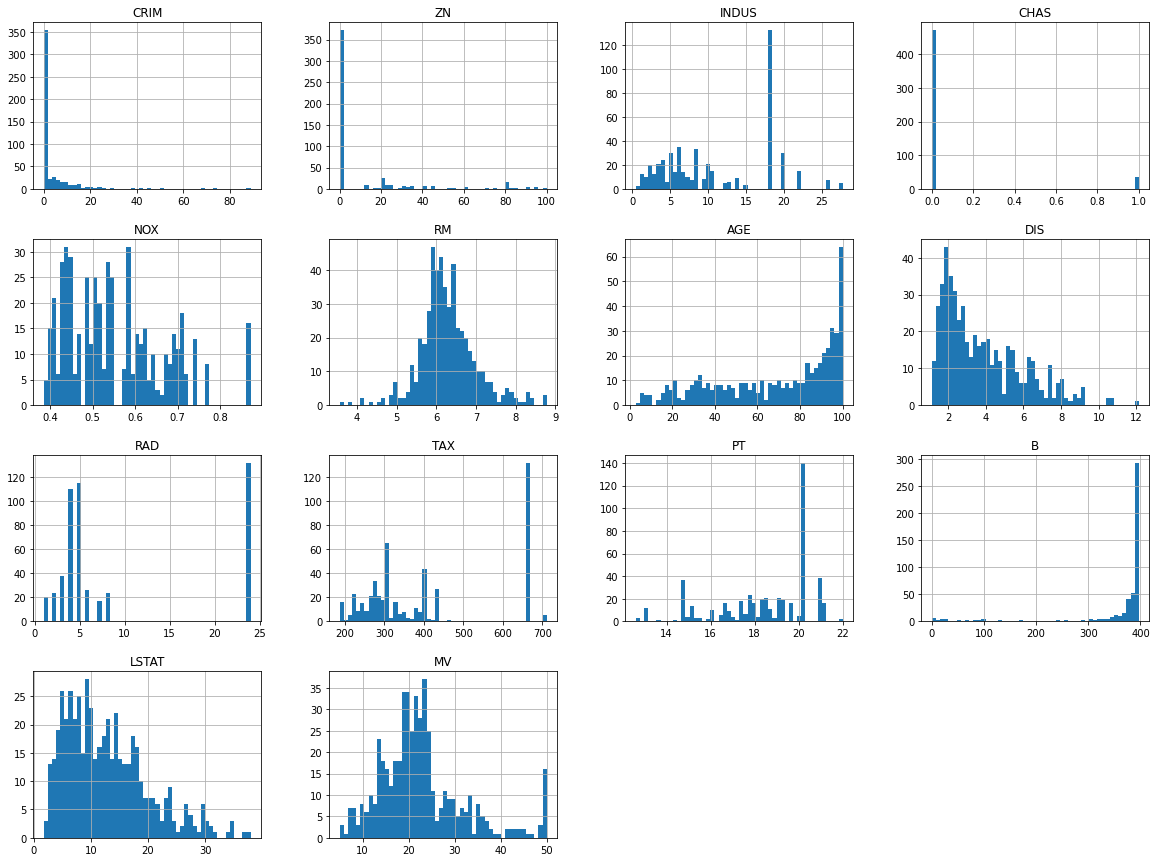

In [102]:
data.hist(bins=50, figsize=(20,15))

Agora que conhecemos os dados, podemos aplicar o método de regressão linear. Para isso especificamos qual será nossa varável dependente (y) e as variáveis independetes (X), ou atributos.

In [103]:
y = data['MV']
X = data.drop('MV', axis=1)

In [104]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

Agora que temos um modelo treinado, podemos prever o valor de um novo exemplo:

In [105]:
x_new = [[0.02731, 0.0, 7.07, 0, 0.469, 6.421, 
          78.900002, 4.9671, 2, 242, 17.799999, 396.899994, 9.14]]

In [106]:
lin_reg.predict(x_new)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([25.02556341])

Também podemos prever uma lista de valores de uma única vez:

In [107]:
X_new = [[0.02731, 0.0, 7.07, 0, 0.469, 6.421, 78.900002, 4.9671, 2, 
          242, 17.799999, 396.899994, 9.14],
         [0.67671, 0.8, 5.56, 0, 0.567, 3.132, 60.678976, 2.3465, 3, 
          432,  9.546666, 342.435664, 3.23], 
         [0.05641, 0.0, 1.04, 1, 0.232, 4.322, 67.564646, 1.5678, 5, 
          567, 15.898006, 224.655678, 5.84]]

In [108]:
lin_reg.predict(X_new)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([25.02556341, 22.96398145, 27.65635662])

Também é possível visualizarmos os coeficientes da reta para cada atributo

In [109]:
lin_reg.coef_

array([-1.08011353e-01,  4.64204559e-02,  2.05586761e-02,  2.68673389e+00,
       -1.77666149e+01,  3.80986498e+00,  6.92223926e-04, -1.47556679e+00,
        3.06049515e-01, -1.23345932e-02, -9.52747256e-01,  9.31168341e-03,
       -5.24758397e-01])

e o valor do bias:

In [110]:
lin_reg.intercept_

36.45949145783325

Também podemos calcular o erro médio quadrado (MSE) do nosso modelo durante o treinamento

In [111]:
mse = mean_squared_error(lin_reg.predict(X), y)
print("MSE: ", mse)
print("RMSE: ", math.sqrt(mse))

MSE:  21.894831188831237
RMSE:  4.679191296456176


## **Desafio II**
Agora que vimos mais um exemplo de uso de regressão linear, você consegue adaptar o exposto para uso de uma técnica de árvore de decisão, como visto no exemplo feito em sala?

In [112]:
# Importações
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score
import math

In [113]:
y = data['MV'] #.astype('int64')
X = data.drop('MV', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [114]:
# Usando árvore de regressão limitando o nível de profundidade para evitar sobreajuste
treereg = DecisionTreeRegressor(max_depth=6)
treereg.fit(X_train, y_train)
y_pred = treereg.predict(X_test)

In [115]:
score = treereg.score(X_test, y_test) 
print("R2:", score)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", math.sqrt(mse))

R2: 0.854129038848649
MSE:  13.811089079812458
RMSE:  3.7163273644570736


**Nesse predição, o R2 está alto, o que é bom. Já o MSE e RMSE estão mais baixo do que os calculados na regressão linear, o que dá mais crédito para a árvore de decisão**

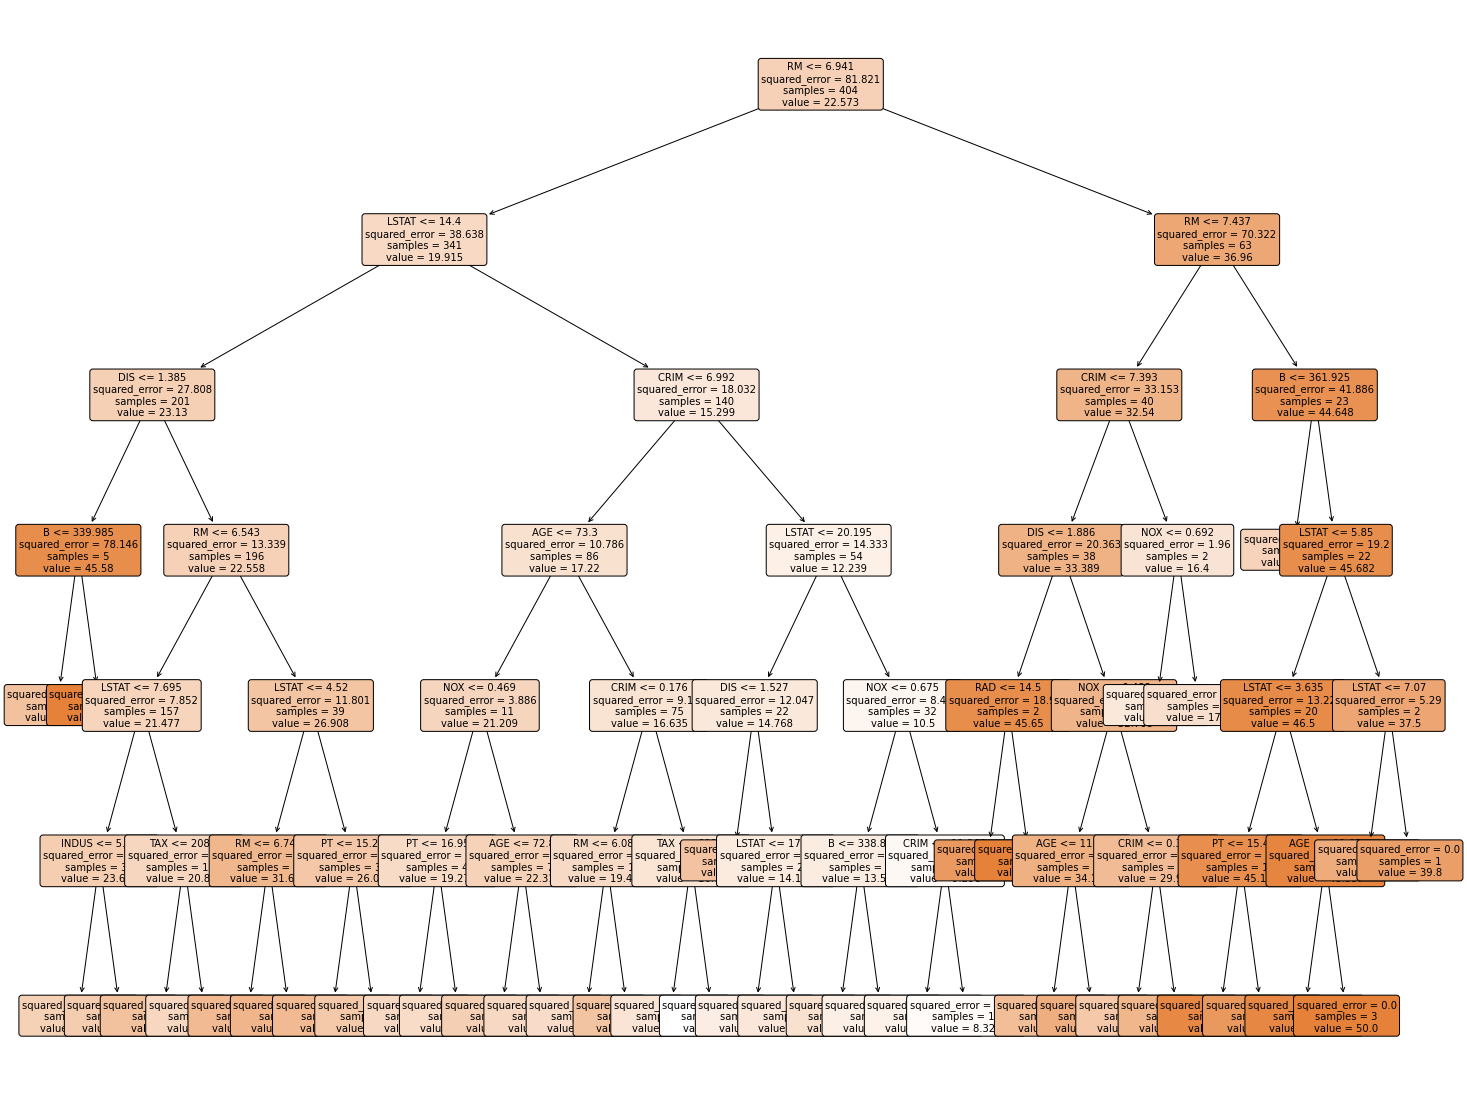

In [116]:
plt.figure(figsize=(25,20))
a = plot_tree(treereg, feature_names=X.columns, class_names=y, filled=True, rounded=True, fontsize=10)

In [119]:
# Usando agora floresta randomica
randfore= RandomForestRegressor(n_estimators=1000)
randfore.fit(X_train, y_train)
y_pred = randfore.predict(X_test)

In [120]:
score = treereg.score(X_test, y_test) 
print("R2:", score)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", math.sqrt(mse))

R2: 0.854129038848649
MSE:  9.067562793063104
RMSE:  3.011239411448898


**Com a floresta randômica o MSE acaba sendo melhor que a árvore de decisão, mas já não possui uma diferença muito significativa do RMSE**